# <p style="text-align: center;"> <b> <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flogodix.com%2Flogo%2F1926702.png&f=1&nofb=1&ipt=eaea19530bb66c5d3a8d88d7ad0d15d5a530f60bcf6c988614bb81afadfd0d0c&ipo=images" alt="ITI Logo" width="200"/> <br><br> ITI Summer Training Camp - Introduction to Machine Learning <br><br> Team Black - Final Project <br><br> <hr width=400> <b> </p>
## <p style="text-align: center;"> <b> Insurance Company Claims - Analysis, Cleaning and Prediction <br><br> <hr width=800> </b> </p>

# Predicting whether a person will default on their premium

Importing necessary libraries

In [3]:
# Data Wrangling 
import numpy as np
import pandas as pd 

# Data Visualisation 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
combine = [train_data, test_data]

In [5]:
train_data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [6]:
test_data.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [7]:
train_data.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


In [8]:
train_data.describe(percentiles = [.08, .07, .06])

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
6%,6934.240000,0.000000,10959.000000,5.795120e+04,0.000000,0.000000,0.000000,97.940000,4.000000,1200.000000,0.000000
7%,8075.280000,0.000000,11321.000000,6.012000e+04,0.000000,0.000000,0.000000,98.060000,5.000000,1200.000000,1.000000
8%,9184.320000,0.001000,11329.000000,6.380000e+04,0.000000,0.000000,0.000000,98.150000,5.000000,1200.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


**Inference**

* 93% of the people have paid their premiums. 
* The age of people is very varied between 21 and 103

In [9]:
plt.figure(figsize = (15, 6))
sns.heatmap(train_data.corr(numeric_only=True), annot = True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 1500x600 with 0 Axes>

## Data Wrangling 

In [10]:
train_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
target                                 0
dtype: int64

In [11]:
test_data.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [12]:
for dataset in combine: 
    dataset['age'] = dataset['age_in_days']//365
    dataset.drop(['age_in_days'], axis = 1, inplace = True)
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86


In [13]:
train_data[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


### Application Under-writing Score

We might need to make income groups to understand the relations better 

In [14]:
train_data['IncomeBands'] = pd.cut(train_data['Income'], 5)
train_data[['IncomeBands', 'target']].groupby('IncomeBands', as_index = False).count()

,IncomeBands,target
0,"(-66208.57, 18071744.0]",79846
1,"(18071744.0, 36119458.0]",4
2,"(36119458.0, 54167172.0]",2
3,"(54167172.0, 72214886.0]",0
4,"(72214886.0, 90262600.0]",1


Let's standardize our data by using a standard scaler

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(train_data[['Income']])
x_scaled = scaler.transform(train_data[['Income']])
x_scaled

array([[0.00366839],
       [0.00322611],
       [0.00066612],
       ...,
       [0.00311386],
       [0.00016955],
       [0.00283814]])

In [16]:
print(scaler.scale_)

[1.10817359e-08]


In [17]:
train_data['scaled_income'] = x_scaled
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,IncomeBands,scaled_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,"(-66208.57, 18071744.0]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,"(-66208.57, 18071744.0]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,"(-66208.57, 18071744.0]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,"(-66208.57, 18071744.0]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,"(-66208.57, 18071744.0]",0.001935


In [18]:
train_data['IncomeBands'] = pd.cut(train_data['scaled_income'], 5)
train_data[['IncomeBands', 'target']].groupby('IncomeBands', as_index = False).count()

,IncomeBands,target
0,"(-0.001, 0.2]",79846
1,"(0.2, 0.4]",4
2,"(0.4, 0.6]",2
3,"(0.6, 0.8]",0
4,"(0.8, 1.0]",1


### Let's try and deal with outlier values

In [19]:
print(train_data['Income'].mean())
print(train_data['Income'].median())

208847.17117703782
166560.0


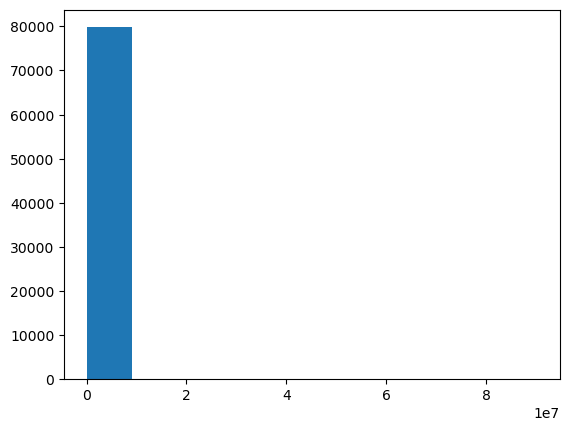

In [20]:
plt.hist(train_data['Income'])
plt.show()

In [21]:
upper_bound = 0.95
lower_bound = 0.1
res = train_data['Income'].quantile([lower_bound, upper_bound])
print(res)

0.10     71200.0
0.95    450050.0
Name: Income, dtype: float64


So, we can collect all the values in this range and let go of the other ones. 

In [22]:
true_index = (train_data['Income'] < res.loc[upper_bound])
true_index

0        True
1        True
2        True
3        True
4        True
         ... 
79848    True
79849    True
79850    True
79851    True
79852    True
Name: Income, Length: 79853, dtype: bool

In [23]:
false_index = ~true_index

In [24]:
no_outlier_data = train_data[true_index].copy()
no_outlier_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,IncomeBands,scaled_income
0,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,"(-0.001, 0.2]",0.001935


In [25]:
no_outlier_data['IncomeBands'] = pd.cut(no_outlier_data['Income'], 5)
no_outlier_data[['IncomeBands', 'target']].groupby('IncomeBands', as_index = False).count()

,IncomeBands,target
0,"(23603.99, 109232.0]",20493
1,"(109232.0, 194434.0]",26922
2,"(194434.0, 279636.0]",16575
3,"(279636.0, 364838.0]",8587
4,"(364838.0, 450040.0]",3269


In [26]:
combine = [train_data, test_data]
for dataset in combine: 
    dataset.loc[ dataset['Income'] <= 23603.99, 'Income'] = 0
    dataset.loc[(dataset['Income'] > 23603.99) & (dataset['Income'] <= 109232.0), 'Income'] = 1
    dataset.loc[(dataset['Income'] > 109232.0) & (dataset['Income'] <= 194434.0), 'Income'] = 2
    dataset.loc[(dataset['Income'] > 194434.0) & (dataset['Income'] <= 279636.0), 'Income'] = 3
    dataset.loc[(dataset['Income'] > 279636.0) & (dataset['Income'] <= 364838.0), 'Income'] = 4
    dataset.loc[(dataset['Income'] > 364838.0) & (dataset['Income'] <= 450040.0), 'Income'] = 5
    dataset.loc[ dataset['Income'] > 450040.0, 'Income'] = 6
    
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,IncomeBands,scaled_income
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,"(-0.001, 0.2]",0.001935


In [27]:
train_data.loc[false_index, 'Income'] = 5
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,IncomeBands,scaled_income
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33,"(-0.001, 0.2]",0.003668
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59,"(-0.001, 0.2]",0.003226
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48,"(-0.001, 0.2]",0.000666
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42,"(-0.001, 0.2]",0.002510
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86,"(-0.001, 0.2]",0.001935


In [28]:
train_data.drop(['IncomeBands', 'scaled_income'], axis = 1, inplace = True)
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,33
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,59
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,48
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,42
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,86


**Let's also make groups for Age**

In [29]:
train_data['AgeBands'] = pd.cut(train_data['age'], 5)
train_data[['AgeBands', 'target']].groupby('AgeBands', as_index = False).count()

,AgeBands,target
0,"(20.918, 37.4]",14314
1,"(37.4, 53.8]",30585
2,"(53.8, 70.2]",26773
3,"(70.2, 86.6]",7531
4,"(86.6, 103.0]",650


In [30]:
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 37.4, 'age'] = 0
    dataset.loc[(dataset['age'] > 37.4) & (dataset['age'] <= 53.8), 'age'] = 1
    dataset.loc[(dataset['age'] > 53.8) & (dataset['age'] <= 70.2), 'age'] = 2
    dataset.loc[(dataset['age'] > 70.2) & (dataset['age'] <= 86.6), 'age'] = 3
    dataset.loc[ dataset['age'] > 86.6, 'age'] = 4
train_data.drop('AgeBands', axis = 1, inplace = True)
combine = [train_data, test_data]
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3


In [31]:
train_data[['age', 'application_underwriting_score']].groupby('age').mean()

,application_underwriting_score
age,
0,99.145848
1,98.978552
2,99.057655
3,99.300457
4,99.537480


In [32]:
train_data['PremBand'] = pd.cut(train_data['no_of_premiums_paid'], 5)
train_data[['PremBand', 'application_underwriting_score']].groupby('PremBand').count()

,application_underwriting_score
PremBand,
"(1.942, 13.6]",56830
"(13.6, 25.2]",18944
"(25.2, 36.8]",1023
"(36.8, 48.4]",62
"(48.4, 60.0]",20


In [33]:
print(train_data['application_underwriting_score'].mean())
print(train_data['application_underwriting_score'].std())

99.06729119785102
0.7397990154151102


In [34]:
print(train_data[train_data['sourcing_channel'] == 'A']['application_underwriting_score'].std())
train_data[['sourcing_channel', 'target']].groupby('sourcing_channel', as_index = False).mean()

0.7695318642626707


,sourcing_channel,target
0,A,0.945542
1,B,0.935441
2,C,0.924994
3,D,0.916126
4,E,0.924466


In [35]:
# print(train_data[train_data['sourcing_channel'] == 'C']['application_underwriting_score'].std())
train_data[['sourcing_channel', 'application_underwriting_score']].groupby('sourcing_channel', as_index = False).mean()

,sourcing_channel,application_underwriting_score
0,A,99.102432
1,B,99.055857
2,C,98.979512
3,D,99.038356
4,E,99.067980


In [36]:
train_data[['residence_area_type', 'application_underwriting_score']].groupby('residence_area_type', as_index = False).mean()

,residence_area_type,application_underwriting_score
0,Rural,99.062726
1,Urban,99.070299


We can set the values of underwriting score on the basis of the sourcing channel

In [37]:
train_data.dtypes

id                                     int64
perc_premium_paid_by_cash_credit     float64
Income                                 int64
Count_3-6_months_late                float64
Count_6-12_months_late               float64
Count_more_than_12_months_late       float64
application_underwriting_score       float64
no_of_premiums_paid                    int64
sourcing_channel                      object
residence_area_type                   object
premium                                int64
target                                 int64
age                                    int64
PremBand                            category
dtype: object

In [38]:
combine = [train_data, test_data]
for dataset in combine: 
    mask1 = dataset['application_underwriting_score'].isnull()
    for source in ['A', 'B', 'C', 'D', 'E']:
        mask2 = (dataset['sourcing_channel'] == source)
        source_mean = dataset[dataset['sourcing_channel'] == source]['application_underwriting_score'].mean()
        dataset.loc[mask1 & mask2, 'application_underwriting_score'] = source_mean
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,PremBand
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0,"(1.942, 13.6]"
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2,"(13.6, 25.2]"
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1,"(1.942, 13.6]"
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1,"(1.942, 13.6]"
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3,"(1.942, 13.6]"


In [39]:
dataset['application_underwriting_score'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
34219    False
34220    False
34221    False
34222    False
34223    False
Name: application_underwriting_score, Length: 34224, dtype: bool

In [40]:
test_data[test_data['Count_3-6_months_late'].isnull()]

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age
661,27504,1.0,1,NaN,NaN,NaN,98.969145,2,C,Urban,0
693,105597,1.0,1,NaN,NaN,NaN,98.969145,2,C,Rural,1
1994,11064,1.0,1,NaN,NaN,NaN,99.043758,2,B,Rural,0
2041,71932,1.0,1,NaN,NaN,NaN,99.104517,2,A,Urban,0
2182,61662,1.0,1,NaN,NaN,NaN,99.104517,2,A,Rural,0
3162,87207,1.0,2,NaN,NaN,NaN,99.890000,2,A,Rural,3
4235,63318,1.0,1,NaN,NaN,NaN,99.104517,2,A,Rural,0
4591,107792,1.0,1,NaN,NaN,NaN,99.104517,2,A,Urban,0
6699,896,1.0,1,NaN,NaN,NaN,99.043758,2,B,Rural,0
8104,60408,1.0,1,NaN,NaN,NaN,99.011623,2,D,Urban,0


 Add  a new variable 'late premium' for late premiums

<AxesSubplot:xlabel='Count_3-6_months_late', ylabel='count'>

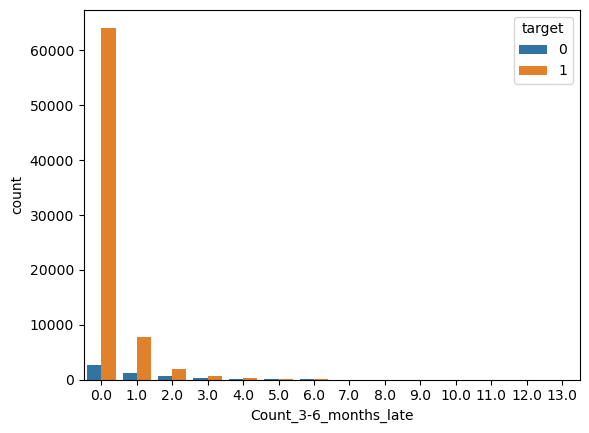

In [41]:
sns.countplot(x = 'Count_3-6_months_late', data = train_data, hue = 'target')

<AxesSubplot:xlabel='Count_6-12_months_late', ylabel='count'>

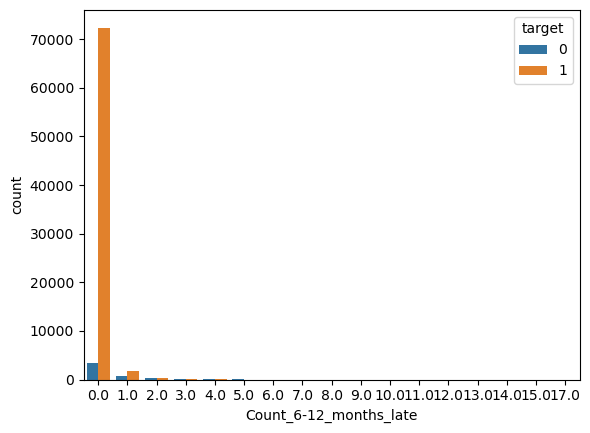

In [42]:
sns.countplot(x = 'Count_6-12_months_late', data = train_data, hue = 'target')

In [43]:
combine = [train_data, test_data]
for dataset in combine: 
    dataset['late_premium'] = 0.0
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,PremBand,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1,"(1.942, 13.6]",0.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3,"(1.942, 13.6]",0.0


In [44]:
combine = [train_data, test_data]
for dataset in combine:
        dataset.loc[(dataset['Count_3-6_months_late'].isnull()),  'late_premium'] = np.NaN
        dataset.loc[(dataset['Count_3-6_months_late'].notnull()), 'late_premium'] = dataset['Count_3-6_months_late'] + dataset['Count_6-12_months_late'] + dataset['Count_more_than_12_months_late']
train_data.head() 

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,PremBand,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3,"(1.942, 13.6]",0.0


In [45]:
train_data['target'].corr(train_data['late_premium'])

-0.3563962516136247

In [46]:
plt.figure(figsize = (15, 6))
sns.heatmap(test_data.corr(numeric_only=True), annot = True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 1500x600 with 0 Axes>

<AxesSubplot:xlabel='late_premium', ylabel='count'>

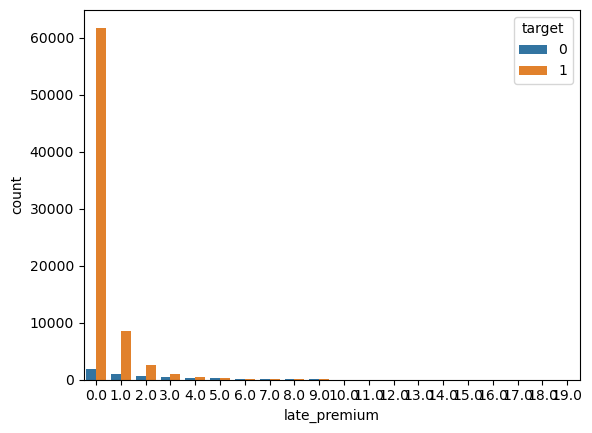

In [47]:
sns.countplot(x = 'late_premium', data = train_data, hue = 'target')

In [48]:
train_data[['late_premium', 'target']].groupby('late_premium').mean()

,target
late_premium,
0.0,0.971659
1.0,0.890487
2.0,0.780694
3.0,0.695418
4.0,0.579800
5.0,0.510684
6.0,0.441696
7.0,0.487654
8.0,0.455556


In [49]:
# for dataset in [train_data]:
train_data.loc[(train_data['target'] == 0) & (train_data['late_premium'].isnull()),'late_premium'] = 7
train_data.loc[(train_data['target'] == 1) & (train_data['late_premium'].isnull()),'late_premium'] = 2
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,PremBand,late_premium
0,110936,0.429,4,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,3,"(1.942, 13.6]",0.0


In [50]:
print(train_data.isnull().sum())
print('\n')
print(test_data.isnull().sum())

id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               97
Count_6-12_months_late              97
Count_more_than_12_months_late      97
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
premium                              0
target                               0
age                                  0
PremBand                             0
late_premium                         0
dtype: int64


id                                   0
perc_premium_paid_by_cash_credit     0
Income                               0
Count_3-6_months_late               31
Count_6-12_months_late              31
Count_more_than_12_months_late      31
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
age       

### Replacing the "late_premium" Value in the Test Data

In [51]:
guess_prem = np.zeros(5)
for dataset in [test_data]:
    for i in range(1, 6):
        guess_df = dataset[(dataset['Income'] == i)]['late_premium'].dropna()

        # age_mean = guess_df.mean()
        # age_std = guess_df.std()
        # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

        premium_guess = guess_df.median()
        guess_prem[i - 1] = int(premium_guess) 

    for j in range(1, 6):
        dataset.loc[(dataset.late_premium.isnull()) & (dataset.Income == j), 'late_premium'] = guess_prem[j - 1] + 1

    dataset['late_premium'] = dataset['late_premium'].astype(int)

test_data.head(10)

,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.001,1,0.0,0.0,0.0,99.890000,7,A,Rural,3,0
1,81136,0.124,4,0.0,0.0,0.0,98.930000,19,A,Urban,2,0
2,70762,1.000,2,0.0,0.0,0.0,99.043758,2,B,Urban,1,0
3,53935,0.198,2,0.0,0.0,0.0,99.000000,11,B,Rural,1,0
4,15476,0.041,3,1.0,0.0,0.0,99.170000,14,A,Rural,0,1
5,64797,0.112,3,0.0,0.0,0.0,98.880000,7,B,Rural,1,0
6,67412,0.325,5,6.0,0.0,0.0,99.000000,27,C,Urban,1,6
7,44241,0.362,1,3.0,0.0,0.0,98.400000,14,A,Urban,2,3
8,5069,0.115,4,0.0,0.0,0.0,99.880000,6,D,Rural,2,0
9,16615,0.021,6,0.0,0.0,0.0,99.890000,11,B,Urban,2,0


In [52]:
train_data.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)
test_data.drop(['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late'], axis = 1, inplace = True)

## Conversion to Numerical Data

In [53]:
# Converting Area Type and sourcing channel to Ordinal Variables
combine = [train_data, test_data]
for dataset in combine: 
    dataset['residence_area_type'] = dataset['residence_area_type'].map( {'Urban' : 1, 'Rural' : 0} )
    dataset['sourcing_channel'] = dataset['sourcing_channel'].map( {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'E' : 4} )
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,PremBand,late_premium
0,110936,0.429,4,99.02,13,2,1,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,99.89,21,0,1,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,98.69,7,2,0,3300,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,99.57,9,0,1,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,99.87,12,1,1,9600,1,3,"(1.942, 13.6]",0.0


In [54]:
train_data['application_underwriting_score'] = train_data['application_underwriting_score']/100
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,PremBand,late_premium
0,110936,0.429,4,0.9902,13,2,1,3300,1,0,"(1.942, 13.6]",0.0
1,41492,0.010,4,0.9989,21,0,1,18000,1,2,"(13.6, 25.2]",0.0
2,31300,0.917,1,0.9869,7,2,0,3300,0,1,"(1.942, 13.6]",6.0
3,19415,0.049,3,0.9957,9,0,1,9600,1,1,"(1.942, 13.6]",0.0
4,99379,0.052,3,0.9987,12,1,1,9600,1,3,"(1.942, 13.6]",0.0


### No. of Premiums Paid

In [55]:
upper_bound = 0.95
res = train_data['no_of_premiums_paid'].quantile([upper_bound])
print(res)


0.95    20.0
Name: no_of_premiums_paid, dtype: float64


In [56]:
true_index = train_data['no_of_premiums_paid'] < res.loc[upper_bound]
false_index = ~true_index
true_index

0         True
1        False
2         True
3         True
4         True
         ...  
79848     True
79849     True
79850     True
79851     True
79852     True
Name: no_of_premiums_paid, Length: 79853, dtype: bool

In [57]:
train_data['PremBand'] = pd.cut(train_data[true_index]['no_of_premiums_paid'], 4)
train_data[['PremBand', 'application_underwriting_score']].groupby('PremBand').count()

,application_underwriting_score
PremBand,
"(1.983, 6.25]",15229
"(6.25, 10.5]",27838
"(10.5, 14.75]",20542
"(14.75, 19.0]",11244


### Premium Column Conversion

In [58]:
upper_bound = 0.90
res = train_data['premium'].quantile([upper_bound])
print(res)
true_index = train_data['premium'] < res.loc[upper_bound]
false_index = ~true_index
true_index

0.9    22200.0
Name: premium, dtype: float64


0         True
1         True
2         True
3         True
4         True
         ...  
79848     True
79849    False
79850     True
79851     True
79852     True
Name: premium, Length: 79853, dtype: bool

In [59]:
train_data['PremBand'] = pd.cut(train_data[true_index]['premium'], 4)
train_data[['PremBand', 'target']].groupby('PremBand').count()

,target
PremBand,
"(1181.1, 5925.0]",30760
"(5925.0, 10650.0]",18613
"(10650.0, 15375.0]",13380
"(15375.0, 20100.0]",8315


In [60]:
test_data.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.001,1,99.890000,7,0,0,3,0
1,81136,0.124,4,98.930000,19,0,1,2,0
2,70762,1.000,2,99.043758,2,1,1,1,0
3,53935,0.198,2,99.000000,11,1,0,1,0
4,15476,0.041,3,99.170000,14,0,0,0,1


In [61]:
combine = [train_data]
for dataset in combine: 
    dataset.loc[ dataset['premium'] <= 5925.0, 'premium'] = 0
    dataset.loc[(dataset['premium'] > 5925.00) & (dataset['premium'] <= 10650.0), 'premium'] = 1
    dataset.loc[(dataset['premium'] > 10650.0) & (dataset['premium'] <= 15375.0), 'premium'] = 2
    dataset.loc[(dataset['premium'] > 15375.0) & (dataset['premium'] <= 201200.0), 'premium'] = 3
    dataset.loc[ dataset['premium'] > 201200.0, 'premium'] = 4
train_data.drop('PremBand', axis = 1, inplace = True)
train_data.head()
combine = [train_data, test_data]

Finally convert percentage premium paid

In [62]:
train_data['PremBand'] = pd.cut(train_data['perc_premium_paid_by_cash_credit'], 4)
train_data[['PremBand', 'target']].groupby('PremBand').mean()

,target
PremBand,
"(-0.001, 0.25]",0.976381
"(0.25, 0.5]",0.945482
"(0.5, 0.75]",0.900194
"(0.75, 1.0]",0.817460


In [63]:
combine = [train_data, test_data]
for dataset in combine: 
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] <= 0.25, 'perc_premium_paid_by_cash_credit'] = 0
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.25) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.5), 'perc_premium_paid_by_cash_credit'] = 1
    dataset.loc[(dataset['perc_premium_paid_by_cash_credit'] > 0.5) & (dataset['perc_premium_paid_by_cash_credit'] <= 0.75), 'perc_premium_paid_by_cash_credit'] = 2
    dataset.loc[ dataset['perc_premium_paid_by_cash_credit'] > 0.75, 'perc_premium_paid_by_cash_credit'] = 3
train_data.drop('PremBand', axis = 1, inplace = True)
train_data.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target,age,late_premium
0,110936,3.0,4,0.9902,13,2,1,0,1,0,0.0
1,41492,0.0,4,0.9989,21,0,1,3,1,2,0.0
2,31300,3.0,1,0.9869,7,2,0,0,0,1,6.0
3,19415,0.0,3,0.9957,9,0,1,1,1,1,0.0
4,99379,0.0,3,0.9987,12,1,1,1,1,3,0.0


In [64]:
test_data.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0.0,1,99.890000,7,0,0,3,0
1,81136,0.0,4,98.930000,19,0,1,2,0
2,70762,3.0,2,99.043758,2,1,1,1,0
3,53935,0.0,2,99.000000,11,1,0,1,0
4,15476,0.0,3,99.170000,14,0,0,0,1


In [65]:
train_data[['perc_premium_paid_by_cash_credit', 'late_premium']] = train_data[['perc_premium_paid_by_cash_credit', 'late_premium']].astype(int)
test_data[['perc_premium_paid_by_cash_credit']] = test_data[['perc_premium_paid_by_cash_credit']].astype(int)
test_data.head()

,id,perc_premium_paid_by_cash_credit,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,649,0,1,99.890000,7,0,0,3,0
1,81136,0,4,98.930000,19,0,1,2,0
2,70762,3,2,99.043758,2,1,1,1,0
3,53935,0,2,99.000000,11,1,0,1,0
4,15476,0,3,99.170000,14,0,0,0,1


## Building our models

Let's make the data splits

In [66]:
X_train = train_data.drop(['id', 'target', 'premium', 'perc_premium_paid_by_cash_credit'], axis = 1).copy()
y_train = train_data['target']
X_test = test_data.drop(['id', 'perc_premium_paid_by_cash_credit'], axis = 1).copy()
print(X_train.shape, y_train.shape, X_test.shape)

(79853, 7) (79853,) (34224, 7)


In [67]:
X_train.head()

,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,4,0.9902,13,2,1,0,0
1,4,0.9989,21,0,1,2,0
2,1,0.9869,7,2,0,1,6
3,3,0.9957,9,0,1,1,0
4,3,0.9987,12,1,1,3,0


In [68]:
X_test.head()

,Income,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age,late_premium
0,1,99.890000,7,0,0,3,0
1,4,98.930000,19,0,1,2,0
2,2,99.043758,2,1,1,1,0
3,2,99.000000,11,1,0,1,0
4,3,99.170000,14,0,0,0,1


### Machine Learning Models (Supervised)

In [69]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

93.93

In [70]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

92.39

In [71]:
# KNN - K Nearest Neighbours

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

94.6

In [72]:
# Perceptron Algorithm

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

93.74

In [73]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

93.79

In [74]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth = 7)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

94.11

In [75]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

98.89

In [76]:
pred_values = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
pred_values.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,98.89
0,KNN,94.60
6,Decision Tree,94.11
1,Logistic Regression,93.93
5,Stochastic Gradient Decent,93.79
4,Perceptron,93.74
3,Naive Bayes,92.39


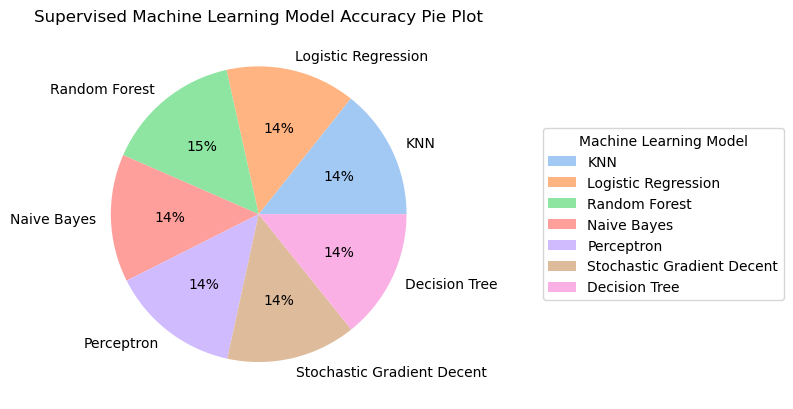

In [77]:
colors = sns.color_palette('pastel')[0:7]
plt.pie(pred_values['Score'], labels = pred_values['Model'], colors = colors, autopct='%.0f%%')
plt.title('Supervised Machine Learning Model Accuracy Pie Plot')
plt.legend(title="Machine Learning Model", loc="center left", bbox_to_anchor=(1.25, 0, 0.5, 1))
plt.show()

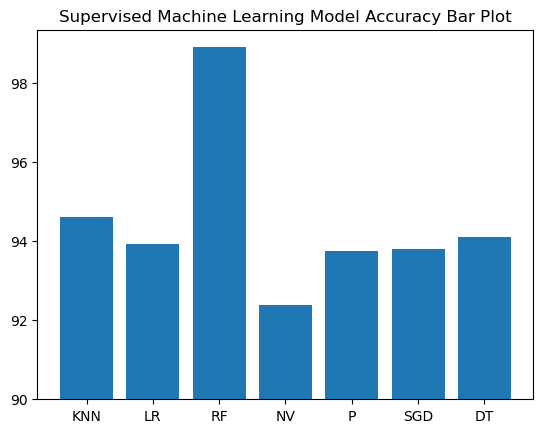

In [78]:
model_names = ["KNN","LR","RF","NV","P","SGD","DT"]
plt.bar(x=model_names, height = pred_values['Score']-90, bottom = 90)
plt.title('Supervised Machine Learning Model Accuracy Bar Plot')
plt.show()

In [79]:
prediction = pd.DataFrame({
        "id": test_data["id"],
        "target": y_pred
    })
prediction.to_csv('prediction.csv', index=False)

In [80]:
prediction.describe()

,id,target
count,34224.000000,34224.000000
mean,56739.956376,0.965872
std,32935.402647,0.181561
min,1.000000,0.000000
25%,28254.750000,1.000000
50%,56488.000000,1.000000
75%,85386.250000,1.000000
max,114077.000000,1.000000


### saving the trained model


In [81]:
import pickle
filename = 'trained_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))